In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("data/crimedata_csv_AllNeighbourhoods_AllYears.csv")
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879861 entries, 0 to 879860
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           879861 non-null  object 
 1   YEAR           879861 non-null  int64  
 2   MONTH          879861 non-null  int64  
 3   DAY            879861 non-null  int64  
 4   HOUR           879861 non-null  int64  
 5   MINUTE         879861 non-null  int64  
 6   HUNDRED_BLOCK  879849 non-null  object 
 7   NEIGHBOURHOOD  879717 non-null  object 
 8   X              879785 non-null  float64
 9   Y              879785 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 67.1+ MB


In [20]:
grouped = data.groupby(['TYPE', 'YEAR', 'MONTH']).size().reset_index(name='Observations')
grouped.head()

,TYPE,YEAR,MONTH,Observations
0,Break and Enter Commercial,2003,1,303
1,Break and Enter Commercial,2003,2,254
2,Break and Enter Commercial,2003,3,292
3,Break and Enter Commercial,2003,4,266
4,Break and Enter Commercial,2003,5,290


In [21]:
grouped['YEAR-MONTH'] = pd.to_datetime(grouped[['YEAR', 'MONTH']].assign(DAY=1))
grouped.head()

,TYPE,YEAR,MONTH,Observations,YEAR-MONTH
0,Break and Enter Commercial,2003,1,303,2003-01-01
1,Break and Enter Commercial,2003,2,254,2003-02-01
2,Break and Enter Commercial,2003,3,292,2003-03-01
3,Break and Enter Commercial,2003,4,266,2003-04-01
4,Break and Enter Commercial,2003,5,290,2003-05-01


In [23]:
grouped = grouped[~((grouped['YEAR'] == 2023) & (grouped['MONTH'] == 11))]
grouped

,TYPE,YEAR,MONTH,Observations,YEAR-MONTH
0,Break and Enter Commercial,2003,1,303,2003-01-01
1,Break and Enter Commercial,2003,2,254,2003-02-01
2,Break and Enter Commercial,2003,3,292,2003-03-01
3,Break and Enter Commercial,2003,4,266,2003-04-01
4,Break and Enter Commercial,2003,5,290,2003-05-01
...,...,...,...,...,...
2614,Vehicle Collision or Pedestrian Struck (with I...,2023,6,100,2023-06-01
2615,Vehicle Collision or Pedestrian Struck (with I...,2023,7,104,2023-07-01
2616,Vehicle Collision or Pedestrian Struck (with I...,2023,8,98,2023-08-01
2617,Vehicle Collision or Pedestrian Struck (with I...,2023,9,110,2023-09-01


In [24]:
breaked_and_enter_commercial = grouped[grouped['TYPE']=='Break and Enter Commercial']
breaked_and_enter_commercial.head()

,TYPE,YEAR,MONTH,Observations,YEAR-MONTH
0,Break and Enter Commercial,2003,1,303,2003-01-01
1,Break and Enter Commercial,2003,2,254,2003-02-01
2,Break and Enter Commercial,2003,3,292,2003-03-01
3,Break and Enter Commercial,2003,4,266,2003-04-01
4,Break and Enter Commercial,2003,5,290,2003-05-01


In [25]:
breaked_and_enter_commercial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TYPE          250 non-null    object        
 1   YEAR          250 non-null    int64         
 2   MONTH         250 non-null    int64         
 3   Observations  250 non-null    int64         
 4   YEAR-MONTH    250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.7+ KB


<Axes: xlabel='YEAR-MONTH', ylabel='Observations'>

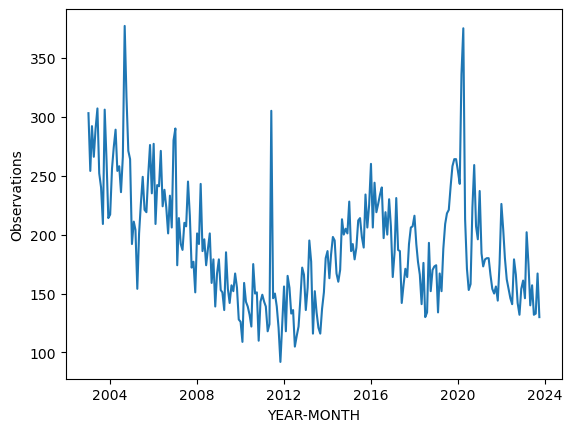

In [26]:
sns.lineplot(data=breaked_and_enter_commercial, x='YEAR-MONTH', y='Observations')